In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

In [5]:
!pip install imblearn

     |████████████████████████████████| 167 kB 1.5 MB/s eta 0:00:01


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [8]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df.isnull().sum().max()

0

In [11]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [12]:
print('No frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

No frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distribution \n (0: No fraud || 1: Fraud)')

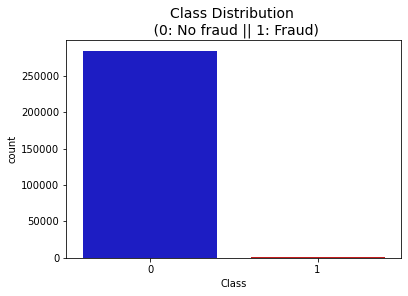

In [13]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data = df, palette=colors)
plt.title('Class Distribution \n (0: No fraud || 1: Fraud)', fontsize = 14)

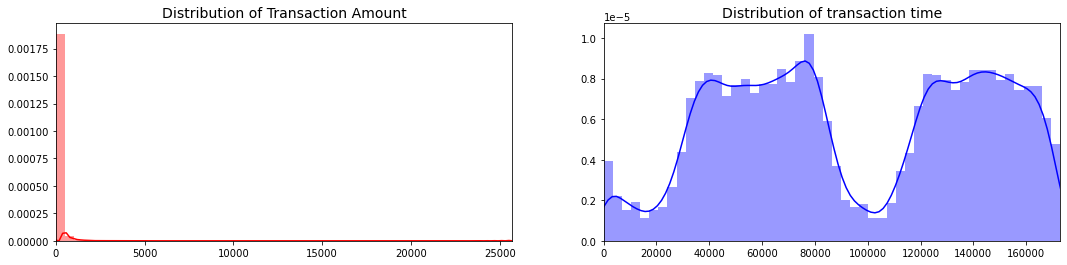

In [14]:
fig, ax = plt.subplots(1, 2, figsize = (18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax = ax[0], color = 'r')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax = ax[1], color = 'b')
ax[1].set_title('Distribution of transaction time', fontsize = 14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis = 1, inplace = True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100, 2), '% of the dataset')

No frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [18]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [19]:
sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [22]:
for train_index, test_index in sss.split(X, y):
    print("Train: ", train_index, "Test: ", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

Train:  [ 30473  30496  31002 ... 284804 284805 284806] Test:  [    0     1     2 ... 57017 57018 57019]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 30473  30496  31002 ... 113964 113965 113966]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [ 81609  82400  83053 ... 170946 170947 170948]
Train:  [     0      1      2 ... 284804 284805 284806] Test:  [150654 150660 150661 ... 227866 227867 227868]
Train:  [     0      1      2 ... 227866 227867 227868] Test:  [212516 212644 213092 ... 284804 284805 284806]


In [23]:
#converting into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

In [24]:
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/len(original_ytrain))
print(test_counts_label/len(original_ytest))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [25]:
##random undersampling
df = df.sample(frac=1)

In [26]:
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

In [27]:
new_df = normal_distributed_df.sample(frac = 1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
74632,0.011458,-0.340887,1.351955,-0.690108,0.090217,-1.747672,-1.002303,-0.840845,-0.468015,-0.090824,...,-0.500596,-0.540984,-1.108659,0.074918,-0.077250,0.365388,-0.923551,0.066001,0.021367,0
247673,3.156012,0.810172,-5.192496,3.164721,-5.047679,2.246597,-4.011781,-0.638908,-2.873463,1.576318,...,-1.850470,1.167244,-1.006617,0.774562,0.063397,-0.390658,1.884741,-1.742558,-0.082216,1
162975,0.250122,0.362340,-0.684983,0.278890,1.557572,-0.801498,0.622917,-0.092375,0.379235,0.080798,...,0.224672,-0.251546,-0.892491,-0.017296,0.487567,0.371783,0.350770,-0.123569,-0.044709,0
43160,3.507441,-0.508641,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,...,-1.614660,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,1
163149,-0.069028,0.364184,-1.550273,1.088689,-2.393388,1.008733,-1.087562,-1.104602,-2.670503,0.147655,...,0.327490,0.802316,1.037105,0.095815,-0.320191,-0.080731,0.091012,0.024928,-0.077820,1


In [29]:
new_df.describe()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,1.330513,0.039189,-2.401349,1.827004,-3.552856,2.284873,-1.643758,-0.685212,-2.739925,0.288632,...,0.197653,0.358716,0.001327,-0.007599,-0.043952,0.008309,0.022757,0.092813,0.038901,0.500000
std,5.070422,0.563368,5.550881,3.769754,6.227816,3.184502,4.310753,1.876967,5.974415,4.883491,...,1.221905,2.798631,1.171621,1.260003,0.568016,0.677405,0.468264,1.037764,0.432380,0.500254
min,-0.307413,-0.992563,-30.552380,-19.417372,-31.103685,-3.079861,-23.611865,-11.847387,-43.557242,-41.044261,...,-10.637028,-22.797604,-8.887017,-19.254328,-2.133641,-4.781606,-1.161463,-7.263482,-2.298957,0.000000
25%,-0.287186,-0.451738,-2.890518,-0.143576,-5.129049,-0.048041,-1.817955,-1.571659,-3.105154,-0.196773,...,-0.199064,-0.168712,-0.541855,-0.239048,-0.373302,-0.327426,-0.282807,-0.062146,-0.054879,0.000000
50%,-0.042339,-0.049419,-0.709626,0.948586,-1.380620,1.299303,-0.463579,-0.664028,-0.635625,0.169980,...,0.030289,0.134314,0.025220,-0.032948,0.008304,0.038024,-0.010091,0.055698,0.035001,0.500000
75%,1.089779,0.584071,1.025957,2.861665,0.342305,4.202830,0.412314,0.104214,0.268208,0.877002,...,0.420465,0.645756,0.568318,0.192714,0.382867,0.376342,0.330956,0.455390,0.214736,1.000000
max,97.263607,1.024260,2.295513,22.057729,2.921807,12.114672,19.440928,16.493227,25.971058,20.007208,...,15.273103,27.202839,8.361985,15.719952,3.261279,3.570877,2.745261,6.211230,1.990689,1.000000


In [30]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


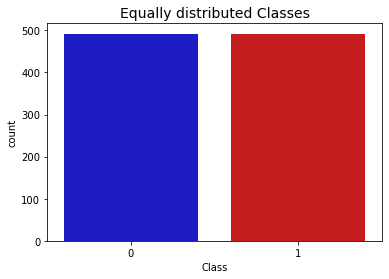

In [31]:
sns.countplot('Class', data = new_df, palette=colors)
plt.title('Equally distributed Classes', fontsize = 14)
plt.show()

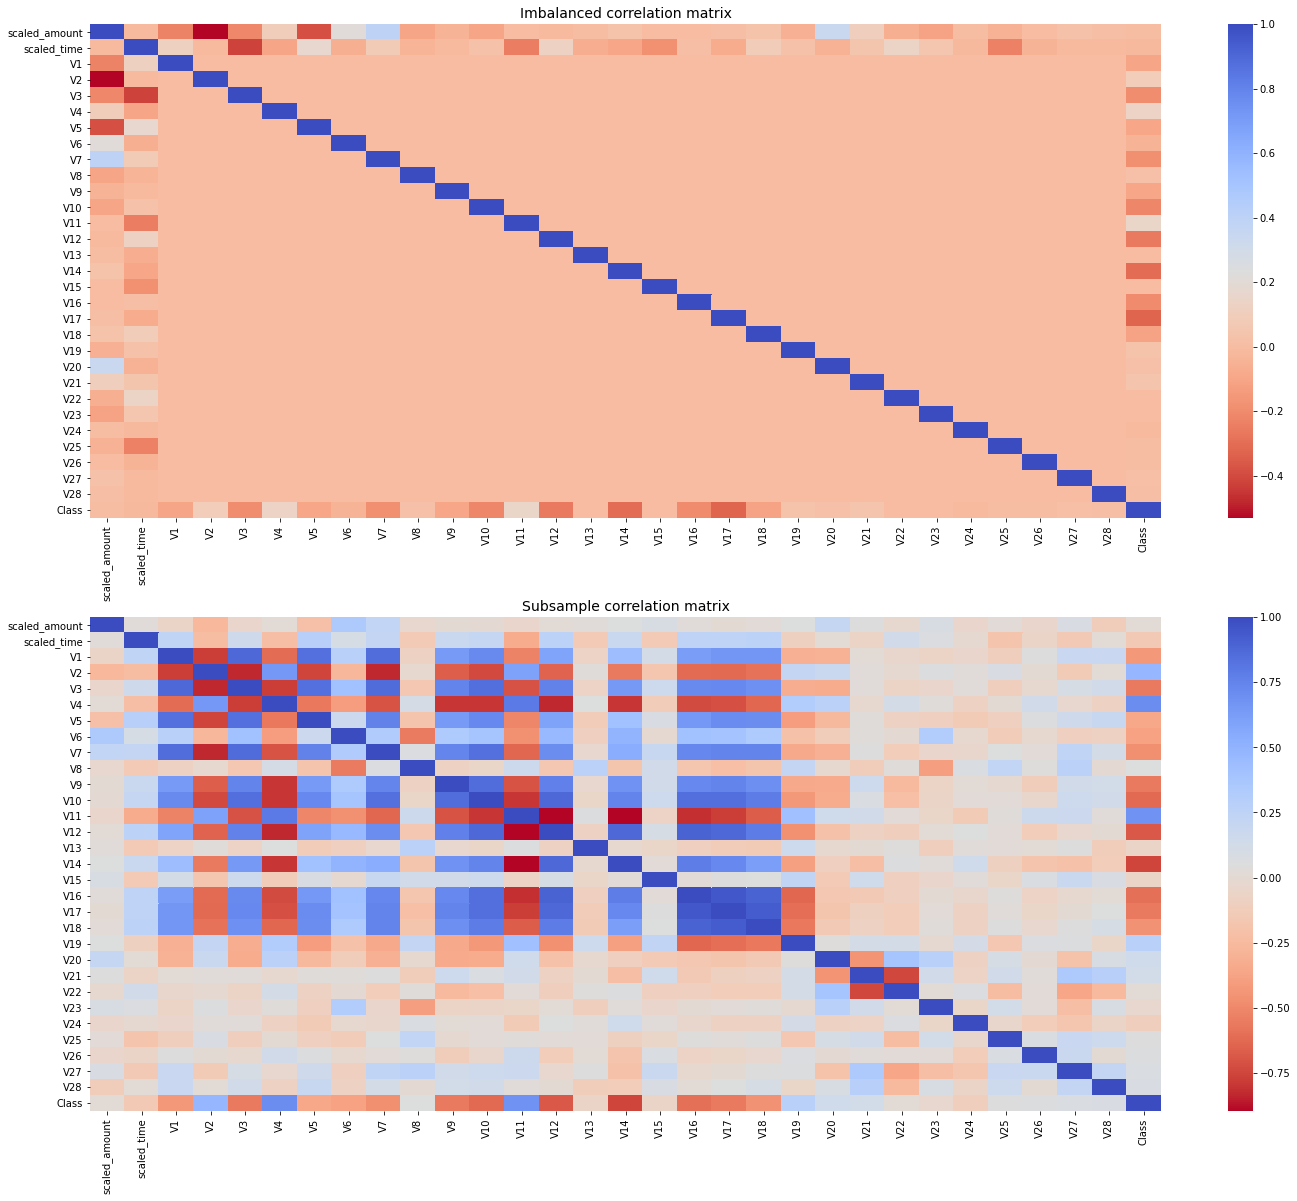

In [33]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (24, 20))

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20}, ax = ax1)
ax1.set_title("Imbalanced correlation matrix", fontsize = 14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws={'size' : 20}, ax = ax2)
ax2.set_title('Subsample correlation matrix', fontsize = 14)
plt.show()

Text(0.5, 1.0, 'V10 vs Class negative correlation')

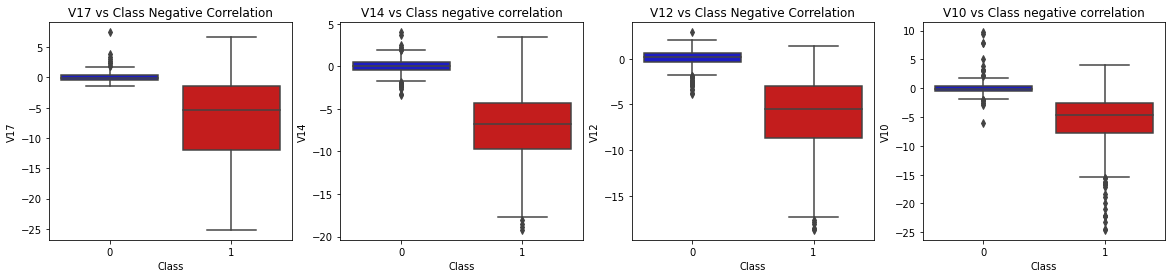

In [36]:
f, axes = plt.subplots(ncols = 4, figsize = (20, 4))

sns.boxplot(x = "Class", y="V17", data = new_df, palette=colors, ax = axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x = "Class", y = "V14", data = new_df, palette=colors, ax = axes[1])
axes[1].set_title('V14 vs Class negative correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x = "Class", y = "V10", data = new_df, palette=colors, ax = axes[3])
axes[3].set_title('V10 vs Class negative correlation')

Text(0.5, 1.0, 'V19 vs Class positive correlation')

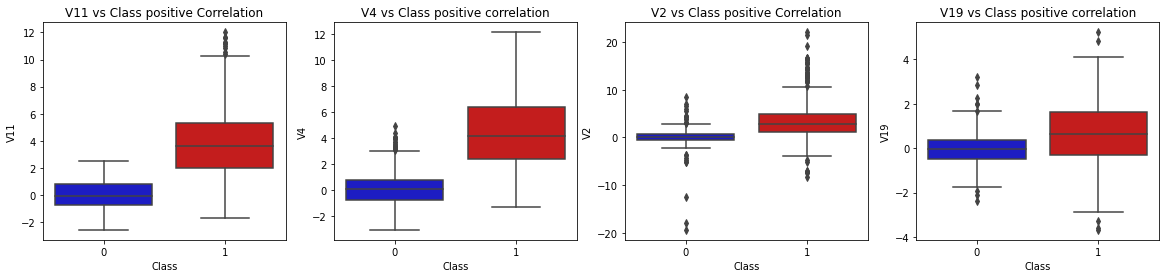

In [37]:
f, axes = plt.subplots(ncols = 4, figsize = (20, 4))

sns.boxplot(x = "Class", y="V11", data = new_df, palette=colors, ax = axes[0])
axes[0].set_title('V11 vs Class positive Correlation')

sns.boxplot(x = "Class", y = "V4", data = new_df, palette=colors, ax = axes[1])
axes[1].set_title('V4 vs Class positive correlation')

sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class positive Correlation')

sns.boxplot(x = "Class", y = "V19", data = new_df, palette=colors, ax = axes[3])
axes[3].set_title('V19 vs Class positive correlation')

Text(0.5, 1.0, 'V10 distribution of Fraud transactions')

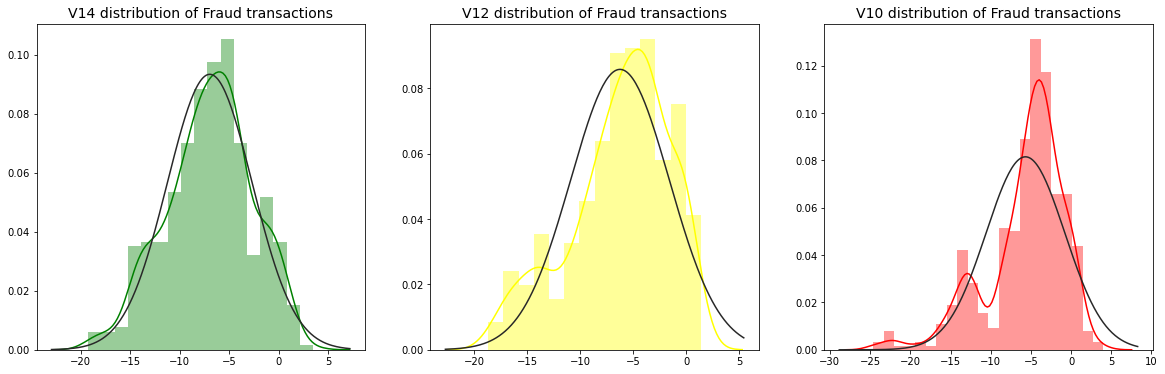

In [41]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax = ax1, fit = norm, color = 'green')
ax1.set_title('V14 distribution of Fraud transactions', fontsize = 14)

v14_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax = ax2, fit = norm, color = 'yellow')
ax2.set_title('V12 distribution of Fraud transactions', fontsize = 14)

v14_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist, ax = ax3, fit = norm, color = 'red')
ax3.set_title('V10 distribution of Fraud transactions', fontsize = 14)